# Notebook 4: Connecting Probability to Machine Learning

## 1. Probability in Classification

### Why We Need Probabilities, Not Just Predictions

In many real-world situations, knowing the *probability* of an outcome is much more valuable than just getting a yes/no prediction:

- A doctor wants to know the probability a patient has a disease to decide whether to order more tests
- A bank wants to know the probability a loan will default to set appropriate interest rates
- A company wants to know the probability a customer will churn to decide whether to offer incentives

Let's see why probabilities matter with a simple example:

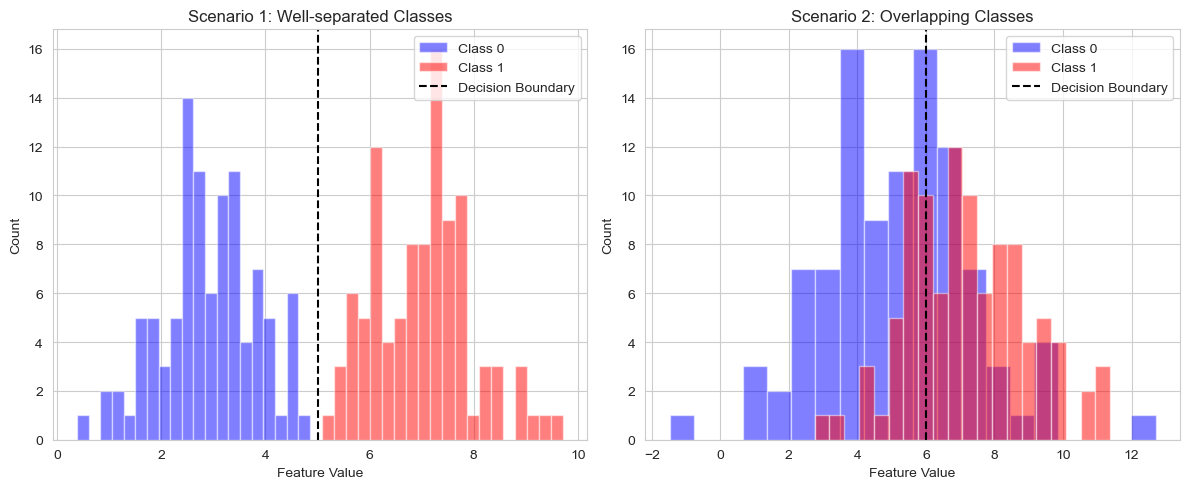

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
sns.set_style('whitegrid')

# Create two example scenarios
np.random.seed(42)

# Scenario 1: Two well-separated classes
x1 = np.random.normal(3, 1, 100)  # Class 0 feature values
x2 = np.random.normal(7, 1, 100)  # Class 1 feature values

# Scenario 2: Two overlapping classes
x3 = np.random.normal(5, 2, 100)  # Class 0 feature values
x4 = np.random.normal(7, 2, 100)  # Class 1 feature values

# Plot the two scenarios
plt.figure(figsize=(12, 5))

# Scenario 1: Well-separated
plt.subplot(1, 2, 1)
plt.hist(x1, alpha=0.5, bins=20, color='blue', label='Class 0')
plt.hist(x2, alpha=0.5, bins=20, color='red', label='Class 1')
plt.axvline(x=5, color='black', linestyle='--', label='Decision Boundary')
plt.title('Scenario 1: Well-separated Classes')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.legend()

# Scenario 2: Overlapping
plt.subplot(1, 2, 2)
plt.hist(x3, alpha=0.5, bins=20, color='blue', label='Class 0')
plt.hist(x4, alpha=0.5, bins=20, color='red', label='Class 1')
plt.axvline(x=6, color='black', linestyle='--', label='Decision Boundary')
plt.title('Scenario 2: Overlapping Classes')
plt.xlabel('Feature Value')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()



In the first scenario, a simple boundary at x=5 gives very confident predictions. But in the second scenario, there's significant overlap, and we'd want to know the probabilities to make informed decisions.

### From Linear Models to Probabilities

One of the most fundamental classification models is **logistic regression**. Despite its name, it's actually a classification method that outputs probabilities.

Let's see how it works conceptually:

1. Start with a linear model (like linear regression): z = w₀ + w₁x₁ + w₂x₂ + ...
2. Apply the logistic function (sigmoid) to transform the output to a probability between 0 and 1:
   - P(y=1) = 1 / (1 + e^(-z))

Let's visualize the logistic (sigmoid) function:



C:\Users\solom\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\solom\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\solom\anaconda33\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


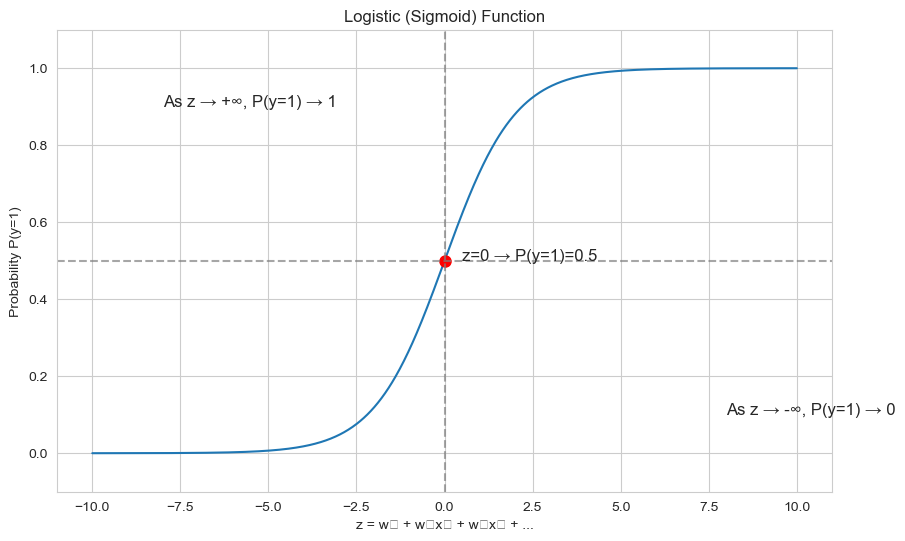

In [2]:
# Visualize the logistic function
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))  # Sigmoid function

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Logistic (Sigmoid) Function')
plt.xlabel('z = w₀ + w₁x₁ + w₂x₂ + ...')
plt.ylabel('Probability P(y=1)')
plt.grid(True)

# Mark some key points
plt.plot([0], [0.5], 'ro', markersize=8)
plt.text(0.5, 0.5, 'z=0 → P(y=1)=0.5', fontsize=12)

plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Show the asymptotes
plt.text(8, 0.1, 'As z → -∞, P(y=1) → 0', fontsize=12)
plt.text(-8, 0.9, 'As z → +∞, P(y=1) → 1', fontsize=12)

plt.ylim(-0.1, 1.1)
plt.show()



### Building a Simple Probabilistic Classifier

Let's create a simple logistic regression model to classify data points:



In [15]:
# Generate a synthetic dataset for binary classification
np.random.seed(42)
n_samples = 100

# Generate a feature and target variable
X = np.random.uniform(0, 10, size=(n_samples, 1))  # Single feature
z = -5 + 1 * X.flatten()  # Linear combination: -5 + 1*X
probabilities = 1 / (1 + np.exp(-z))  # Apply sigmoid
y = np.random.binomial(1, probabilities)  # Generate binary outcomes from probabilities

# Create a DataFrame for easier manipulation
data = pd.DataFrame({
    'X': X.flatten(),
    'y': y
})

# Fit a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

# Generate predictions across the range
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_proba = model.predict_proba(X_range)[:, 1]  # Probability of class 1

# Print model coefficients
print("Logistic Regression Model:")
print(f"Intercept (w₀): {model.intercept_[0]:.4f}")
print(f"Coefficient (w₁): {model.coef_[0][0]:.4f}")

Logistic Regression Model:
Intercept (w₀): -5.8534
Coefficient (w₁): 1.1614


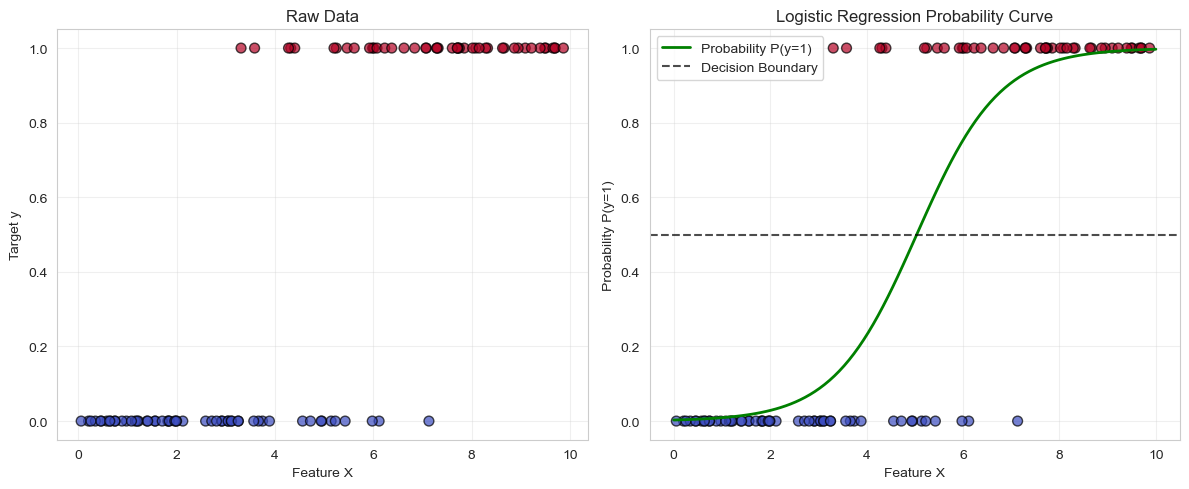

In [16]:
# Visualize the results
plt.figure(figsize=(12, 5))

# Plot the raw data points
plt.subplot(1, 2, 1)
plt.scatter(data['X'], data['y'], c=data['y'], cmap='coolwarm', 
           edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Raw Data')
plt.grid(True, alpha=0.3)

# Plot the probability curve
plt.subplot(1, 2, 2)
plt.scatter(data['X'], data['y'], c=data['y'], cmap='coolwarm', 
           edgecolor='k', s=50, alpha=0.7)
plt.plot(X_range, y_proba, 'g-', linewidth=2, label='Probability P(y=1)')

# Add decision boundary at 0.5 probability
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.7, label='Decision Boundary')

plt.xlabel('Feature X')
plt.ylabel('Probability P(y=1)')
plt.title('Logistic Regression Probability Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Decision Boundaries and Confidence Levels

The beauty of probabilistic classifiers is that they not only tell us which class to predict but also how confident the prediction is. This allows us to set different decision thresholds based on our needs.

Let's explore this with our logistic regression model:



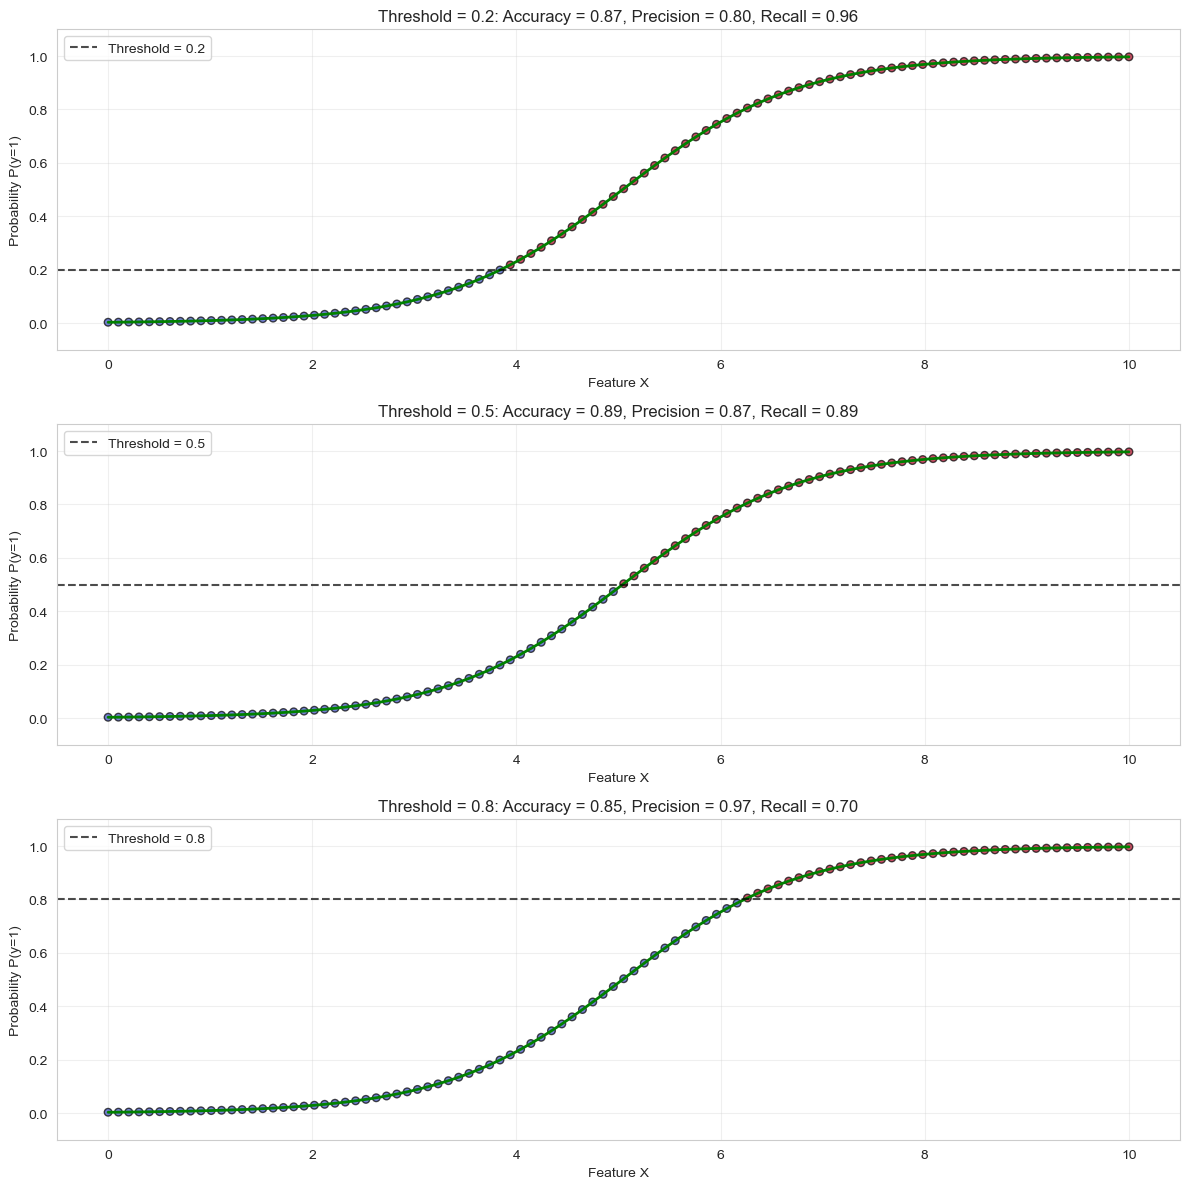

In [17]:
# Analyze different decision thresholds
thresholds = [0.2, 0.5, 0.8]
plt.figure(figsize=(12, 4 * len(thresholds)))

for i, threshold in enumerate(thresholds):
    plt.subplot(len(thresholds), 1, i+1)
    
    # Calculate predictions at this threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Plot data points
    plt.scatter(X_range, y_proba, c=y_pred, cmap='coolwarm', 
               edgecolor='k', s=30, alpha=0.7)
    
    # Plot probability curve
    plt.plot(X_range, y_proba, 'g-', linewidth=2)
    
    # Highlight decision boundary
    plt.axhline(y=threshold, color='k', linestyle='--', alpha=0.7, 
               label=f'Threshold = {threshold}')
    
    # Calculate and display metrics
    from sklearn.metrics import confusion_matrix
    
    threshold_value = threshold
    y_pred_train = (model.predict_proba(X)[:, 1] >= threshold_value).astype(int)
    cm = confusion_matrix(y, y_pred_train)
    
    # True positive, false positive, etc.
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    plt.title(f'Threshold = {threshold}: Accuracy = {accuracy:.2f}, Precision = {precision:.2f}, Recall = {recall:.2f}')
    plt.xlabel('Feature X')
    plt.ylabel('Probability P(y=1)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()


> 🤔 **Think About It**: How does changing the threshold affect the trade-off between false positives and false negatives? When might you want a lower threshold versus a higher threshold?

## 2. Naive Bayes Classification

### The Intuition Behind Naive Bayes

In the previous notebook, we explored Bayes' theorem. Naive Bayes classifiers apply this theorem to classification problems with a simplifying assumption: features are conditionally independent given the class.

Let's recall Bayes' theorem:

$$P(Class|Features) = \frac{P(Features|Class) \times P(Class)}{P(Features)}$$

The "naive" assumption allows us to simplify the likelihood term:

$$P(Features|Class) = P(Feature_1|Class) \times P(Feature_2|Class) \times ... \times P(Feature_n|Class)$$

Let's implement a simple Naive Bayes classifier for a text classification task:

In [18]:
# Create a simple text classification dataset
emails = [
    {'text': 'buy now cheap discount limited offer', 'label': 'spam'},
    {'text': 'meeting tomorrow please bring report', 'label': 'ham'},
    {'text': 'free prize claim immediately', 'label': 'spam'},
    {'text': 'lunch with clients next week', 'label': 'ham'},
    {'text': 'urgent attention required money transfer', 'label': 'spam'},
    {'text': 'project deadline extended new schedule', 'label': 'ham'},
    {'text': 'congratulations won lottery claim prize', 'label': 'spam'},
    {'text': 'conference call scheduled tomorrow morning', 'label': 'ham'}
]

# Tokenize the text (split into words)
for email in emails:
    email['words'] = email['text'].lower().split()

# Calculate prior probabilities
spam_count = sum(1 for email in emails if email['label'] == 'spam')
ham_count = len(emails) - spam_count

p_spam = spam_count / len(emails)
p_ham = ham_count / len(emails)

print(f"Prior probabilities:")
print(f"P(Spam) = {p_spam:.3f}")
print(f"P(Ham) = {p_ham:.3f}")

Prior probabilities:
P(Spam) = 0.500
P(Ham) = 0.500


In [19]:
# Collect all unique words
all_words = set()
for email in emails:
    all_words.update(email['words'])

print(f"\nVocabulary size: {len(all_words)}")


Vocabulary size: 37


In [20]:
# Count word occurrences in each class
spam_word_counts = {}
ham_word_counts = {}

for email in emails:
    for word in email['words']:
        if email['label'] == 'spam':
            spam_word_counts[word] = spam_word_counts.get(word, 0) + 1
        else:
            ham_word_counts[word] = ham_word_counts.get(word, 0) + 1

# Calculate word likelihoods with Laplace smoothing
def word_likelihood(word, label):
    # Add 1 to numerator for smoothing (to avoid zero probabilities)
    # Add vocabulary size to denominator for smoothing
    if label == 'spam':
        return (spam_word_counts.get(word, 0) + 1) / (sum(spam_word_counts.values()) + len(all_words))
    else:
        return (ham_word_counts.get(word, 0) + 1) / (sum(ham_word_counts.values()) + len(all_words))

# Calculate likelihood ratios for some interesting words
interesting_words = ['free', 'meeting', 'money', 'report', 'prize', 'tomorrow']

print("\nWord likelihood ratios (P(word|spam) / P(word|ham)):")
for word in interesting_words:
    ratio = word_likelihood(word, 'spam') / word_likelihood(word, 'ham')
    print(f"'{word}': {ratio:.2f}x")


Word likelihood ratios (P(word|spam) / P(word|ham)):
'free': 2.00x
'meeting': 0.50x
'money': 2.00x
'report': 0.50x
'prize': 3.00x
'tomorrow': 0.33x


In [21]:
# Create a naive Bayes classifier
def classify_naive_bayes(text):
    words = text.lower().split()
    
    # Calculate log probabilities to avoid underflow
    log_prob_spam = np.log(p_spam)
    log_prob_ham = np.log(p_ham)
    
    for word in words:
        log_prob_spam += np.log(word_likelihood(word, 'spam'))
        log_prob_ham += np.log(word_likelihood(word, 'ham'))
    
    # Convert back from log space and normalize
    prob_spam = np.exp(log_prob_spam)
    prob_ham = np.exp(log_prob_ham)
    total = prob_spam + prob_ham
    
    prob_spam /= total
    prob_ham /= total
    
    return {
        'class': 'spam' if prob_spam > prob_ham else 'ham',
        'spam_probability': prob_spam,
        'ham_probability': prob_ham
    }

In [22]:
# Test the classifier
test_texts = [
    'free money now',
    'meeting tomorrow morning',
    'free prize meeting',
    'money transfer report'
]

print("\nClassification results:")
for text in test_texts:
    result = classify_naive_bayes(text)
    print(f"Text: '{text}'")
    print(f"Classification: {result['class']}")
    print(f"P(Spam) = {result['spam_probability']:.4f}")
    print(f"P(Ham) = {result['ham_probability']:.4f}\n")


Classification results:
Text: 'free money now'
Classification: spam
P(Spam) = 0.8889
P(Ham) = 0.1111

Text: 'meeting tomorrow morning'
Classification: ham
P(Spam) = 0.0769
P(Ham) = 0.9231

Text: 'free prize meeting'
Classification: spam
P(Spam) = 0.7500
P(Ham) = 0.2500

Text: 'money transfer report'
Classification: spam
P(Spam) = 0.6667
P(Ham) = 0.3333



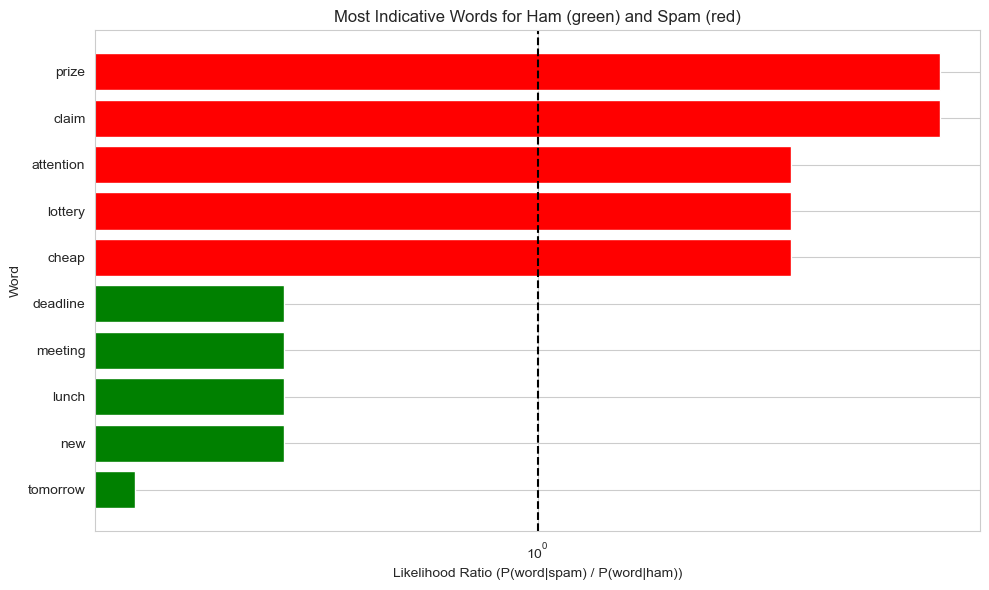

In [23]:
# Visualize most predictive words
plt.figure(figsize=(10, 6))

# Calculate likelihood ratios for all words
word_ratios = {}
for word in all_words:
    ratio = word_likelihood(word, 'spam') / word_likelihood(word, 'ham')
    word_ratios[word] = ratio

# Sort and select top and bottom words
sorted_words = sorted(word_ratios.items(), key=lambda x: x[1])
spam_indicative = sorted_words[-5:]  # Top spam indicators
ham_indicative = sorted_words[:5]    # Top ham indicators

# Combine into a single visualization
all_indicative = ham_indicative + spam_indicative
words = [word for word, ratio in all_indicative]
ratios = [ratio for word, ratio in all_indicative]
colors = ['green']*5 + ['red']*5

plt.barh(words, ratios, color=colors)
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Likelihood Ratio (P(word|spam) / P(word|ham))')
plt.ylabel('Word')
plt.title('Most Indicative Words for Ham (green) and Spam (red)')
plt.xscale('log')  # Use log scale for better visualization
plt.tight_layout()
plt.show()


### The Independence Assumption

The "naive" part of Naive Bayes comes from assuming that features (words in our example) are conditionally independent given the class. This means that knowing one word appears doesn't affect the probability of other words appearing, given the class.

This assumption is often violated in real-world data (words do tend to co-occur), but Naive Bayes can still perform surprisingly well in practice, especially for text classification.

Here's a visualization of the independence assumption:



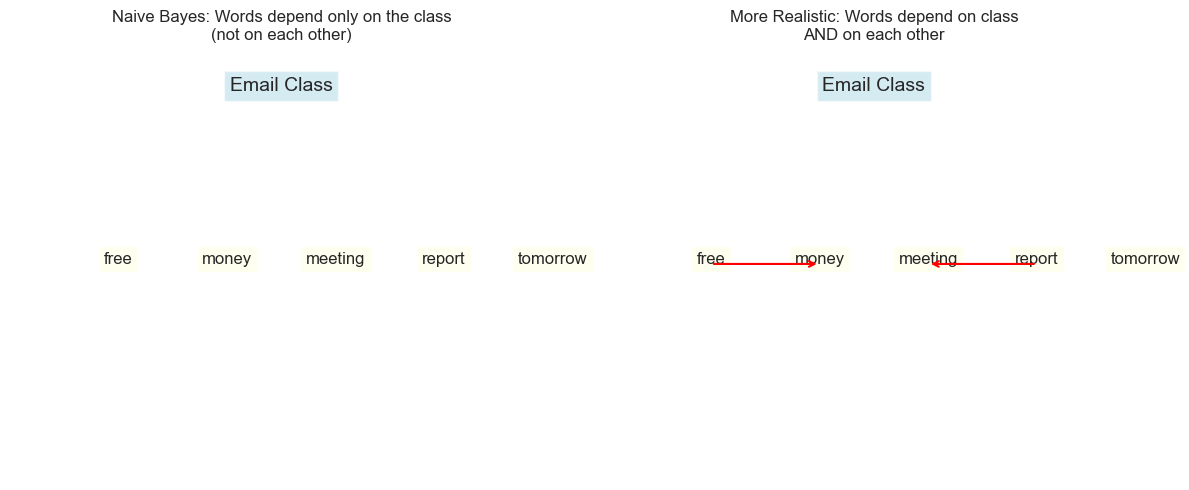

In [24]:
# Visualize the independence assumption
plt.figure(figsize=(12, 5))

# Create a network diagram-like visualization
plt.subplot(1, 2, 1)
plt.axis('off')
plt.text(0.5, 0.9, 'Email Class', fontsize=14, ha='center', 
         bbox=dict(facecolor='lightblue', alpha=0.5))

# Draw arrows to words
words = ['free', 'money', 'meeting', 'report', 'tomorrow']
positions = [(0.2, 0.5), (0.4, 0.5), (0.6, 0.5), (0.8, 0.5), (1.0, 0.5)]

for i, (word, pos) in enumerate(zip(words, positions)):
    plt.annotate('', xy=pos, xytext=(0.5, 0.8),
                arrowprops=dict(arrowstyle='->', lw=1.5))
    plt.text(pos[0], pos[1], word, fontsize=12, ha='center',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

plt.title('Naive Bayes: Words depend only on the class\n(not on each other)')

# Contrast with a more realistic model
plt.subplot(1, 2, 2)
plt.axis('off')
plt.text(0.5, 0.9, 'Email Class', fontsize=14, ha='center', 
         bbox=dict(facecolor='lightblue', alpha=0.5))

# Draw arrows to words
for i, (word, pos) in enumerate(zip(words, positions)):
    plt.annotate('', xy=pos, xytext=(0.5, 0.8),
                arrowprops=dict(arrowstyle='->', lw=1.5))
    plt.text(pos[0], pos[1], word, fontsize=12, ha='center',
            bbox=dict(facecolor='lightyellow', alpha=0.5))

# Add inter-word dependencies
plt.annotate('', xy=(0.4, 0.5), xytext=(0.2, 0.5),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))
plt.annotate('', xy=(0.6, 0.5), xytext=(0.8, 0.5),
            arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

plt.title('More Realistic: Words depend on class\nAND on each other')

plt.tight_layout()
plt.show()



### Using Naive Bayes in Scikit-learn

Let's use scikit-learn's implementation of Naive Bayes for a more robust text classification example:



In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
texts = [email['text'] for email in emails]
labels = [email['label'] for email in emails]

# Create a text classification pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

# Train the model
text_clf.fit(texts, labels)

# Test on some new examples
test_texts = [
    'free money now',
    'meeting tomorrow morning',
    'free prize meeting',
    'money transfer report',
    'project deadline discussion',
    'claim your lottery prize now'
]

# Make predictions
predictions = text_clf.predict(test_texts)
probabilities = text_clf.predict_proba(test_texts)

# Display results
print("\nScikit-learn Naive Bayes Predictions:")
for i, text in enumerate(test_texts):
    # Find the probability of the predicted class
    predicted_class = predictions[i]
    spam_idx = list(text_clf.classes_).index('spam')
    spam_prob = probabilities[i][spam_idx]
    
    print(f"Text: '{text}'")
    print(f"Prediction: {predicted_class}")
    print(f"P(Spam) = {spam_prob:.4f}")
    print(f"P(Ham) = {1-spam_prob:.4f}\n")


Scikit-learn Naive Bayes Predictions:
Text: 'free money now'
Prediction: spam
P(Spam) = 0.8889
P(Ham) = 0.1111

Text: 'meeting tomorrow morning'
Prediction: ham
P(Spam) = 0.0769
P(Ham) = 0.9231

Text: 'free prize meeting'
Prediction: spam
P(Spam) = 0.7500
P(Ham) = 0.2500

Text: 'money transfer report'
Prediction: spam
P(Spam) = 0.6667
P(Ham) = 0.3333

Text: 'project deadline discussion'
Prediction: ham
P(Spam) = 0.2000
P(Ham) = 0.8000

Text: 'claim your lottery prize now'
Prediction: spam
P(Spam) = 0.9730
P(Ham) = 0.0270



In [26]:
# Get the top features for each class
vectorizer = text_clf.named_steps['vect']
classifier = text_clf.named_steps['clf']

feature_names = vectorizer.get_feature_names_out()
top_spam_indices = np.argsort(classifier.feature_log_prob_[1])[-10:]
top_ham_indices = np.argsort(classifier.feature_log_prob_[0])[-10:]

print("Top spam words:")
print([feature_names[i] for i in top_spam_indices])

print("\nTop ham words:")
print([feature_names[i] for i in top_ham_indices])

Top spam words:
['immediately', 'free', 'discount', 'congratulations', 'cheap', 'buy', 'offer', 'won', 'prize', 'claim']

Top ham words:
['extended', 'conference', 'clients', 'next', 'new', 'morning', 'with', 'lunch', 'please', 'tomorrow']


## 3. Cross-entropy and Log Likelihood as Loss Functions

### From Probabilities to Loss Functions

In machine learning, we need a way to measure how good our probability estimates are. This is where loss functions come in.

For classification tasks with probability outputs, the most common loss function is **cross-entropy loss** (also called **log loss**):

$$L(y, \hat{p}) = -[y \log(\hat{p}) + (1-y) \log(1-\hat{p})]$$

Where:
- y is the true label (0 or 1)
- $\hat{p}$ is the predicted probability of class 1

Let's visualize how cross-entropy loss behaves:

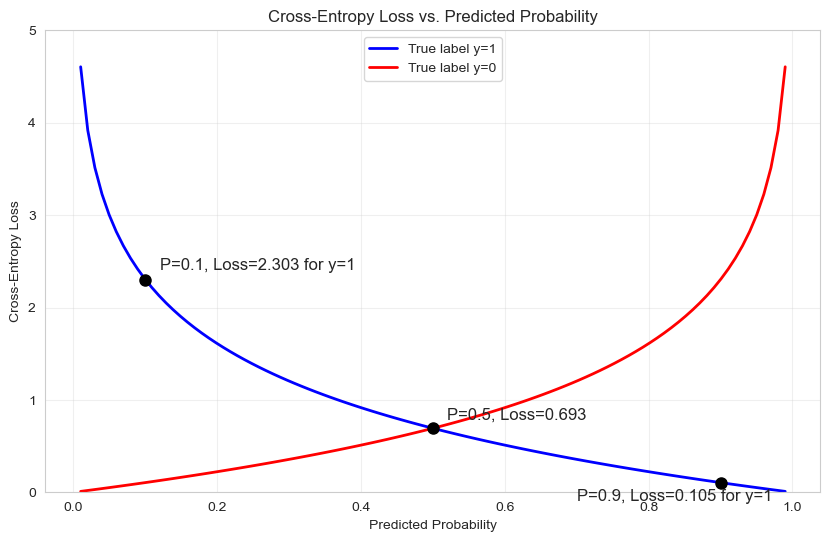

In [8]:
# Visualize cross-entropy loss
predicted_probs = np.linspace(0.01, 0.99, 100)

# Calculate loss for true label y=1
loss_y1 = -np.log(predicted_probs)

# Calculate loss for true label y=0
loss_y0 = -np.log(1 - predicted_probs)

plt.figure(figsize=(10, 6))
plt.plot(predicted_probs, loss_y1, 'b-', linewidth=2, label='True label y=1')
plt.plot(predicted_probs, loss_y0, 'r-', linewidth=2, label='True label y=0')

plt.xlabel('Predicted Probability')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss vs. Predicted Probability')
plt.legend()
plt.grid(True, alpha=0.3)

# Mark some key points
plt.plot([0.5], [-np.log(0.5)], 'ko', markersize=8)
plt.text(0.52, -np.log(0.5) + 0.1, 'P=0.5, Loss=0.693', fontsize=12)

plt.plot([0.1], [-np.log(0.1)], 'ko', markersize=8)
plt.text(0.12, -np.log(0.1) + 0.1, 'P=0.1, Loss=2.303 for y=1', fontsize=12)

plt.plot([0.9], [-np.log(0.9)], 'ko', markersize=8)
plt.text(0.7, -np.log(0.9) - 0.2, 'P=0.9, Loss=0.105 for y=1', fontsize=12)

plt.ylim(0, 5)
plt.show()



> 💡 **Key Insight**: Cross-entropy loss heavily penalizes confident but wrong predictions. For example, if the true label is 1 but you predict a probability of 0.01, the loss is enormous!

### Why Cross-entropy Works Well for Classification

Cross-entropy loss has several desirable properties:

1. It heavily penalizes confident but wrong predictions
2. It provides a smooth gradient for optimization
3. It's compatible with probabilistic outputs
4. It's derived from the principle of maximum likelihood estimation

Let's see how cross-entropy compares to other possible loss functions:



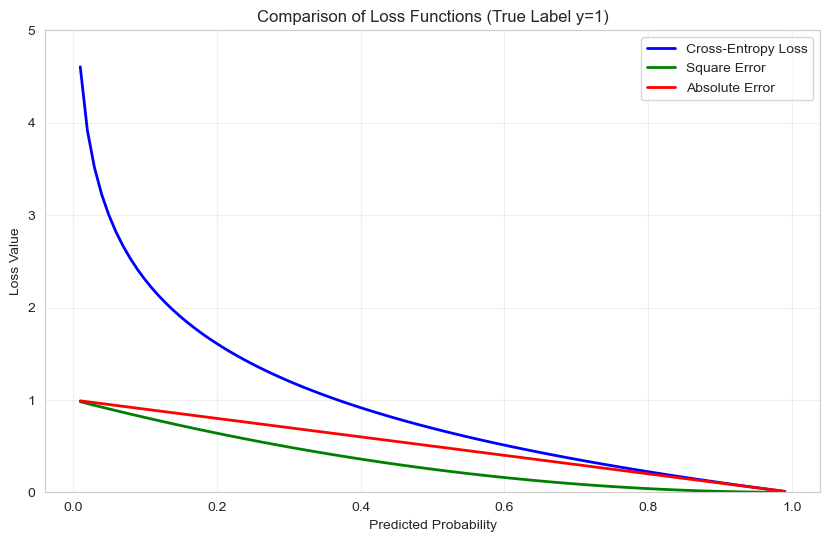

In [9]:
# Compare different loss functions
predicted_probs = np.linspace(0.01, 0.99, 100)

# Cross-entropy for y=1
cross_entropy = -np.log(predicted_probs)

# Square error for y=1
square_error = (1 - predicted_probs)**2

# Absolute error for y=1
absolute_error = 1 - predicted_probs

plt.figure(figsize=(10, 6))
plt.plot(predicted_probs, cross_entropy, 'b-', linewidth=2, label='Cross-Entropy Loss')
plt.plot(predicted_probs, square_error, 'g-', linewidth=2, label='Square Error')
plt.plot(predicted_probs, absolute_error, 'r-', linewidth=2, label='Absolute Error')

plt.xlabel('Predicted Probability')
plt.ylabel('Loss Value')
plt.title('Comparison of Loss Functions (True Label y=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 5)
plt.show()



### Calculating Cross-entropy Loss in Practice

Let's calculate cross-entropy loss for our logistic regression model:



In [10]:
# Calculate cross-entropy loss for our logistic regression model
from sklearn.metrics import log_loss

# Get the predicted probabilities
y_pred_proba = model.predict_proba(X)[:, 1]

# Calculate cross-entropy loss
cross_entropy_loss = log_loss(y, y_pred_proba)
print(f"Cross-entropy loss: {cross_entropy_loss:.4f}")

# Calculate cross-entropy manually to understand what's happening
manual_loss = -np.mean(y * np.log(y_pred_proba) + (1 - y) * np.log(1 - y_pred_proba))
print(f"Manually calculated loss: {manual_loss:.4f}")

# Calculate cross-entropy loss for different decision thresholds
threshold_values = [0.2, 0.5, 0.8]
hard_predictions = [(y_pred_proba >= threshold).astype(int) for threshold in threshold_values]

for i, threshold in enumerate(threshold_values):
    # Convert hard predictions to "soft" probabilities (0 or 1)
    hard_loss = log_loss(y, hard_predictions[i])
    print(f"Loss with hard predictions at threshold {threshold}: {hard_loss:.4f}")


Cross-entropy loss: 0.2465
Manually calculated loss: 0.2465
Loss with hard predictions at threshold 0.2: 4.6857
Loss with hard predictions at threshold 0.5: 3.9648
Loss with hard predictions at threshold 0.8: 5.4065


## 4. Probabilistic Outputs in Neural Networks (Softmax)

### From Logits to Probabilities

Neural networks, much like logistic regression, output raw scores (called logits) that need to be converted to probabilities. For binary classification, we use the sigmoid function. For multi-class classification, we use the **softmax function**:

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$

Where:
- $z_i$ is the raw score (logit) for class i
- K is the total number of classes

Let's visualize how softmax works:

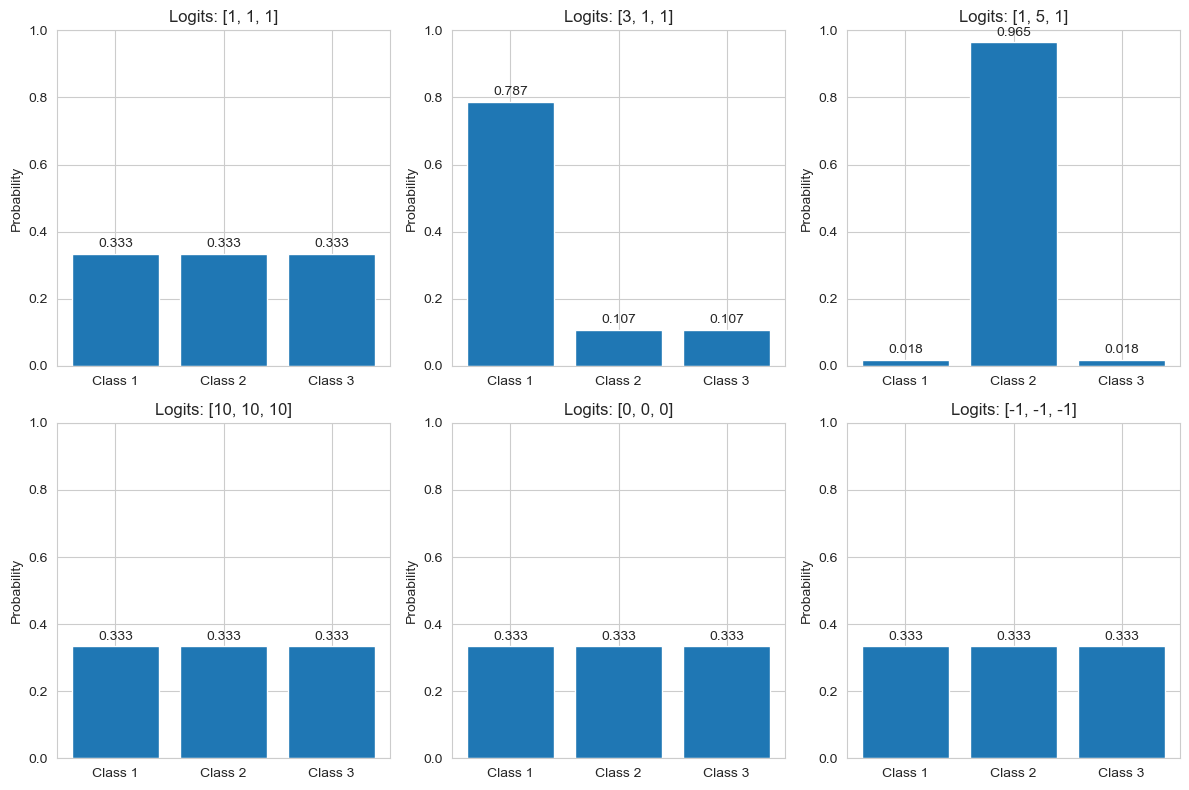

In [11]:
# Visualize softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z)

# Generate some example logits for 3 classes
logits_examples = [
    [1, 1, 1],      # Equal logits
    [3, 1, 1],      # First class has higher logit
    [1, 5, 1],      # Second class has higher logit
    [10, 10, 10],   # Equal but large logits
    [0, 0, 0],      # Equal but zero logits
    [-1, -1, -1]    # Equal but negative logits
]

plt.figure(figsize=(12, 8))

for i, logits in enumerate(logits_examples):
    plt.subplot(2, 3, i+1)
    probs = softmax(logits)
    
    plt.bar(['Class 1', 'Class 2', 'Class 3'], probs)
    plt.ylim(0, 1)
    plt.title(f'Logits: {logits}')
    plt.ylabel('Probability')
    
    # Add probability values on top of bars
    for j, p in enumerate(probs):
        plt.text(j, p + 0.02, f'{p:.3f}', ha='center')

plt.tight_layout()
plt.show()



> 💡 **Key Insight**: Softmax ensures all probabilities are between 0 and 1 and sum to 1, making them valid probabilities across all classes.

### A Simple Neural Network Classifier

Let's build a simple neural network with softmax output for multi-class classification:



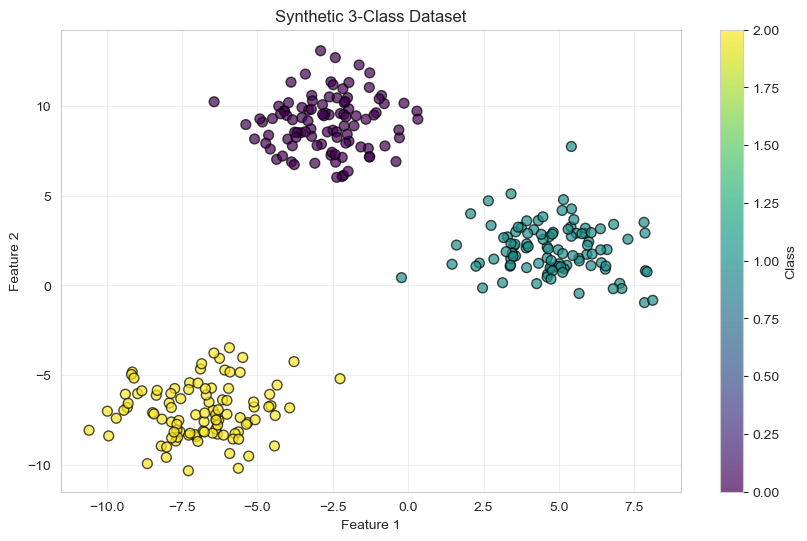

In [27]:
# Create a synthetic multi-class dataset
from sklearn.datasets import make_blobs

# Generate a 3-class dataset
X_multiclass, y_multiclass = make_blobs(n_samples=300, centers=3, 
                                        random_state=42, cluster_std=1.5)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, cmap='viridis',
           edgecolor='k', s=50, alpha=0.7)
plt.title('Synthetic 3-Class Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
# Build a simple neural network with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Set random seed for reproducibility
tf.random.set_seed(42)

# Create a simple neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 neurons
    Dense(3, activation='softmax')  # Output layer with softmax for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_multiclass, y_multiclass, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=0,
                    validation_split=0.2)

C:\Users\solom\anaconda33\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


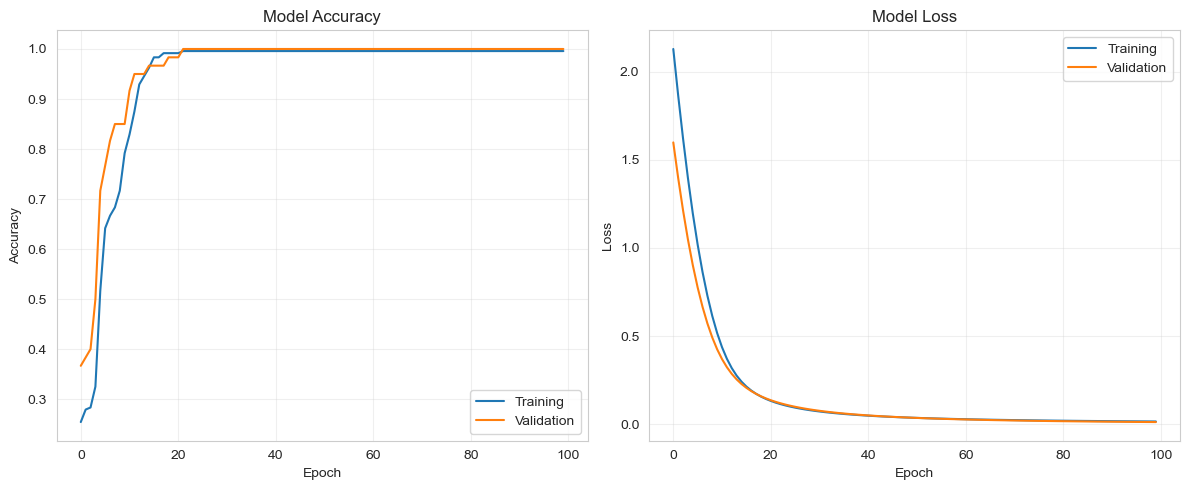

In [29]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Create a prediction function for visualization
def plot_decision_boundary(model, X, y):
    # Define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    # Define the grid
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    # Create a mesh grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # Flatten the grid to pass to the model
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Get predictions
    Z = model.predict(grid_points)
    Z = np.argmax(Z, axis=1)  # Get class with highest probability
    
    # Reshape the predictions back to the grid
    Z = Z.reshape(xx.shape)
    
    # Plot the grid of predictions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot the original points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
               edgecolor='k', s=50, alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Class')
    plt.title('Decision Boundaries')
    plt.grid(True, alpha=0.3)

1650/1650 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


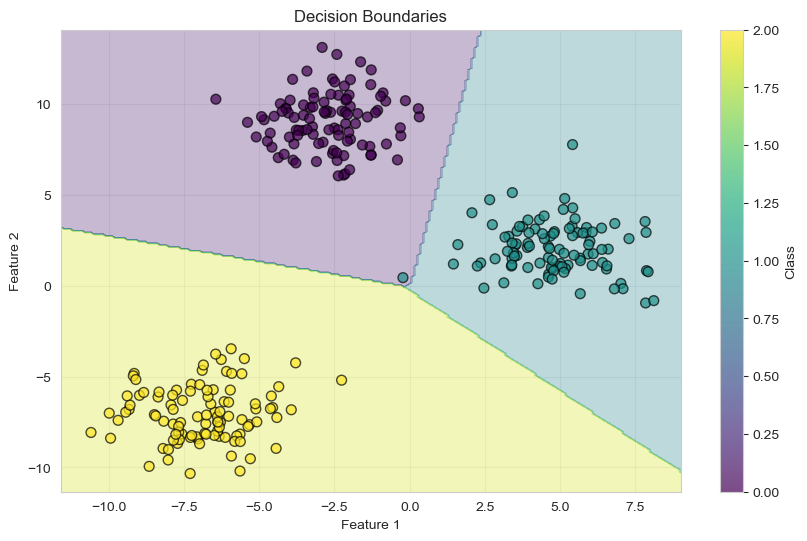

In [31]:
# Visualize the decision boundaries
plt.figure(figsize=(10, 6))
plot_decision_boundary(model, X_multiclass, y_multiclass)
plt.show()

In [32]:
# Make predictions for some test points
test_points = np.array([
    [0, 0],      # Point near the center
    [-4, -3],    # Point near class 0
    [3, 3],      # Point near class 1
    [0, 4]       # Point near class 2
])

# Get both class predictions and probabilities
class_preds = model.predict(test_points)

# Display results
print("\nNeural Network Predictions for Test Points:")
for i, point in enumerate(test_points):
    print(f"Point: ({point[0]}, {point[1]})")
    print(f"Predicted class: {np.argmax(class_preds[i])}")
    print(f"Class probabilities: {class_preds[i]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Neural Network Predictions for Test Points:
Point: (0, 0)
Predicted class: 1
Class probabilities: [0.34845462 0.37287408 0.27867126]

Point: (-4, -3)
Predicted class: 2
Class probabilities: [0.00470288 0.05266819 0.94262886]

Point: (3, 3)
Predicted class: 1
Class probabilities: [0.01878597 0.9767368  0.00447723]

Point: (0, 4)
Predicted class: 0
Class probabilities: [0.7296668  0.2421286  0.02820456]



1650/1650 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


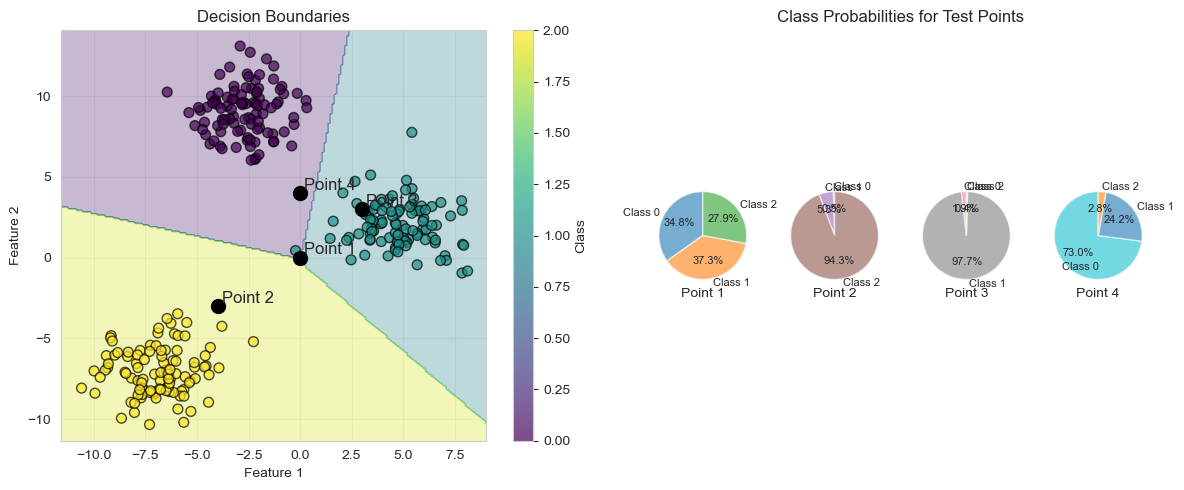

In [33]:
# Visualize the test points and their predictions
plt.figure(figsize=(12, 5))

# Plot decision boundaries
plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_multiclass, y_multiclass)

# Add test points with annotations
for i, point in enumerate(test_points):
    plt.plot(point[0], point[1], 'ko', markersize=10)
    plt.text(point[0] + 0.2, point[1] + 0.2, f'Point {i+1}', fontsize=12)

# Show the probabilities as pie charts
plt.subplot(1, 2, 2)
for i, point in enumerate(test_points):
    plt.pie(class_preds[i], labels=[f'Class {j}' for j in range(3)],
           autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8}, 
           wedgeprops={'alpha': 0.6}, 
           radius=0.5, center=(i*1.5, 0))
    plt.text(i*1.5, -0.7, f'Point {i+1}', ha='center')

plt.axis('equal')
plt.title('Class Probabilities for Test Points')
plt.tight_layout()
plt.show()


### Why Probabilistic Outputs Matter in Neural Networks

Neural networks with probabilistic outputs have several advantages:

1. **Uncertainty Quantification**: They tell us how confident the model is in its predictions
2. **Decision Thresholds**: We can adjust thresholds based on different requirements
3. **Ensemble Learning**: Probabilities from multiple models can be combined
4. **Active Learning**: We can identify uncertain predictions for further labeling

Let's explore how model confidence can vary across the input space:



416/416 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


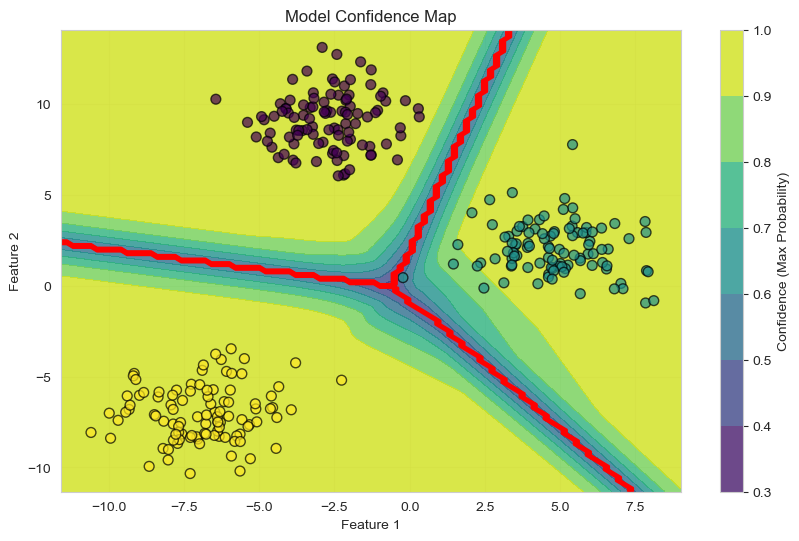

In [13]:
# Visualize model confidence across the input space
# Define bounds of the domain
min1, max1 = X_multiclass[:, 0].min()-1, X_multiclass[:, 0].max()+1
min2, max2 = X_multiclass[:, 1].min()-1, X_multiclass[:, 1].max()+1

# Define the grid
x1grid = np.arange(min1, max1, 0.2)
x2grid = np.arange(min2, max2, 0.2)

# Create a mesh grid
xx, yy = np.meshgrid(x1grid, x2grid)

# Flatten the grid to pass to the model
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions
probs = model.predict(grid_points)

# Calculate confidence as the maximum probability
confidence = np.max(probs, axis=1)

# Reshape back to grid
confidence = confidence.reshape(xx.shape)

# Plot confidence map
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, confidence, alpha=0.8, cmap='viridis')
plt.colorbar(label='Confidence (Max Probability)')

# Plot decision boundaries
predicted_classes = np.argmax(probs, axis=1).reshape(xx.shape)
plt.contour(xx, yy, predicted_classes, colors='red', linewidths=2)

# Plot the original points
plt.scatter(X_multiclass[:, 0], X_multiclass[:, 1], c=y_multiclass, 
           edgecolor='k', s=50, alpha=0.7, cmap='viridis')

plt.title('Model Confidence Map')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()


> 💡 **Key Insight**: Notice how the model's confidence decreases near the decision boundaries and in regions with few training examples!

## 5. Sample Application: Customer Churn Prediction

Let's put everything together with a practical application: predicting customer churn (when customers leave a service). This is an important business problem where probabilities are crucial for decision-making.

In [34]:
# Create a synthetic customer dataset
np.random.seed(42)
n_customers = 1000

# Generate features
tenure = np.random.gamma(shape=2, scale=10, size=n_customers)  # Months as customer
monthly_charges = 50 + 0.5 * tenure + np.random.normal(0, 10, n_customers)  # Monthly bill
total_charges = tenure * monthly_charges + np.random.normal(0, 100, n_customers)  # Total spent
contract_length = np.random.choice([1, 12, 24], n_customers, p=[0.5, 0.3, 0.2])  # Contract length in months
service_calls = np.random.poisson(lam=2, size=n_customers)  # Number of support calls

# Create a more realistic relationship to churn
logit = 1 - 0.1 * tenure + 0.05 * (monthly_charges - 50) + 0.2 * service_calls - 0.05 * contract_length
churn_prob = 1 / (1 + np.exp(-logit))
churn = np.random.binomial(1, churn_prob)

# Create a DataFrame
customer_data = pd.DataFrame({
    'Tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'ContractLength': contract_length,
    'ServiceCalls': service_calls,
    'Churn': churn
})

# Display basic statistics
print("Customer Churn Dataset:")
print(f"Total customers: {n_customers}")
print(f"Churn rate: {customer_data['Churn'].mean():.2f}")
print("\nFeature summary:")
print(customer_data.describe().round(2))

Customer Churn Dataset:
Total customers: 1000
Churn rate: 0.40

Feature summary:
        Tenure  MonthlyCharges  TotalCharges  ContractLength  ServiceCalls  \
count  1000.00         1000.00       1000.00         1000.00       1000.00   
mean     20.60           60.44       1343.93            8.78          1.91   
std      14.03           12.05       1154.79            8.96          1.30   
min       0.46           28.91       -107.16            1.00          0.00   
25%      10.26           52.02        548.21            1.00          1.00   
50%      17.29           60.01       1017.03            1.00          2.00   
75%      27.42           68.15       1745.71           12.00          3.00   
max      77.87          102.26       7808.20           24.00          8.00   

         Churn  
count  1000.00  
mean      0.40  
std       0.49  
min       0.00  
25%       0.00  
50%       0.00  
75%       1.00  
max       1.00  


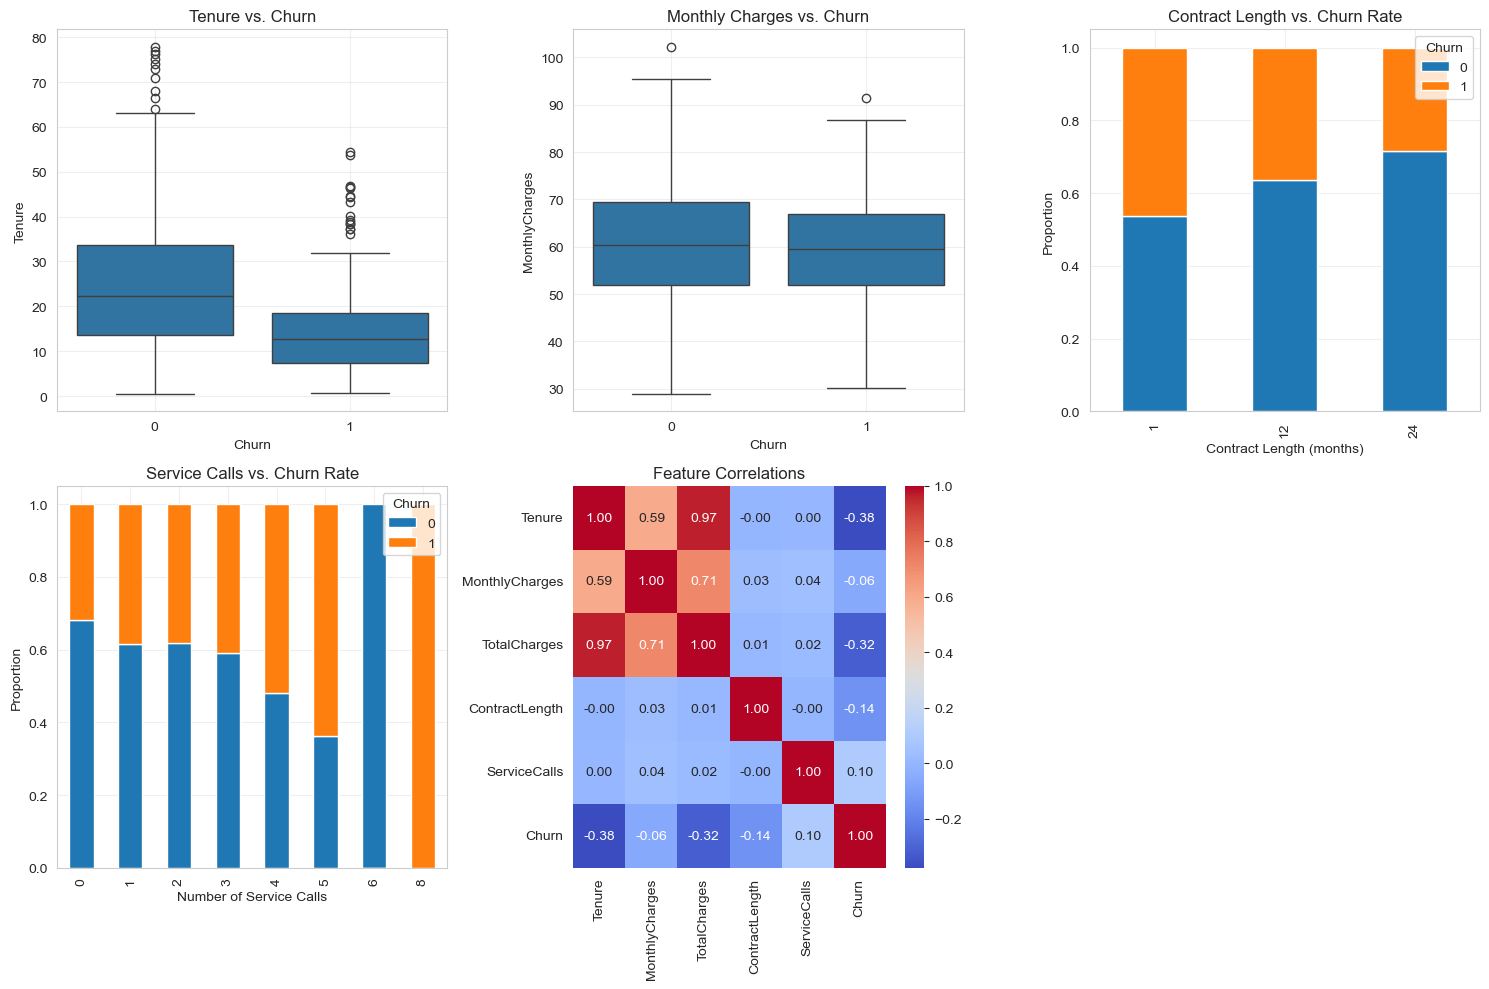

In [35]:
# Explore relationship between features and churn
plt.figure(figsize=(15, 10))

# Tenure vs. Churn
plt.subplot(2, 3, 1)
sns.boxplot(x='Churn', y='Tenure', data=customer_data)
plt.title('Tenure vs. Churn')
plt.grid(True, alpha=0.3)

# Monthly Charges vs. Churn
plt.subplot(2, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=customer_data)
plt.title('Monthly Charges vs. Churn')
plt.grid(True, alpha=0.3)

# Contract Length vs. Churn
plt.subplot(2, 3, 3)
contract_churn = pd.crosstab(customer_data['ContractLength'], customer_data['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Contract Length vs. Churn Rate')
plt.xlabel('Contract Length (months)')
plt.ylabel('Proportion')
plt.grid(True, alpha=0.3)

# Service Calls vs. Churn
plt.subplot(2, 3, 4)
service_churn = pd.crosstab(customer_data['ServiceCalls'], customer_data['Churn'], normalize='index')
service_churn.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Service Calls vs. Churn Rate')
plt.xlabel('Number of Service Calls')
plt.ylabel('Proportion')
plt.grid(True, alpha=0.3)

# Correlation heatmap
plt.subplot(2, 3, 5)
correlation = customer_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlations')

plt.tight_layout()
plt.show()

In [36]:
# Build a logistic regression model for churn prediction
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Prepare the data
X = customer_data.drop('Churn', axis=1)
y = customer_data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
churn_model = LogisticRegression(random_state=42)
churn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_prob = churn_model.predict_proba(X_test_scaled)[:, 1]
y_pred = churn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = churn_model.score(X_test_scaled, y_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

print("\nChurn Prediction Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {average_precision:.4f}")


Churn Prediction Model Performance:
Accuracy: 0.7500
ROC AUC: 0.8175
Average Precision: 0.7706


In [37]:
# Print model coefficients
feature_names = X.columns
coefficients = churn_model.coef_[0]
print("\nFeature Coefficients (log-odds):")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")


Feature Coefficients (log-odds):
Tenure: -1.1757
MonthlyCharges: 0.7031
TotalCharges: -0.3731
ContractLength: -0.4048
ServiceCalls: 0.1446


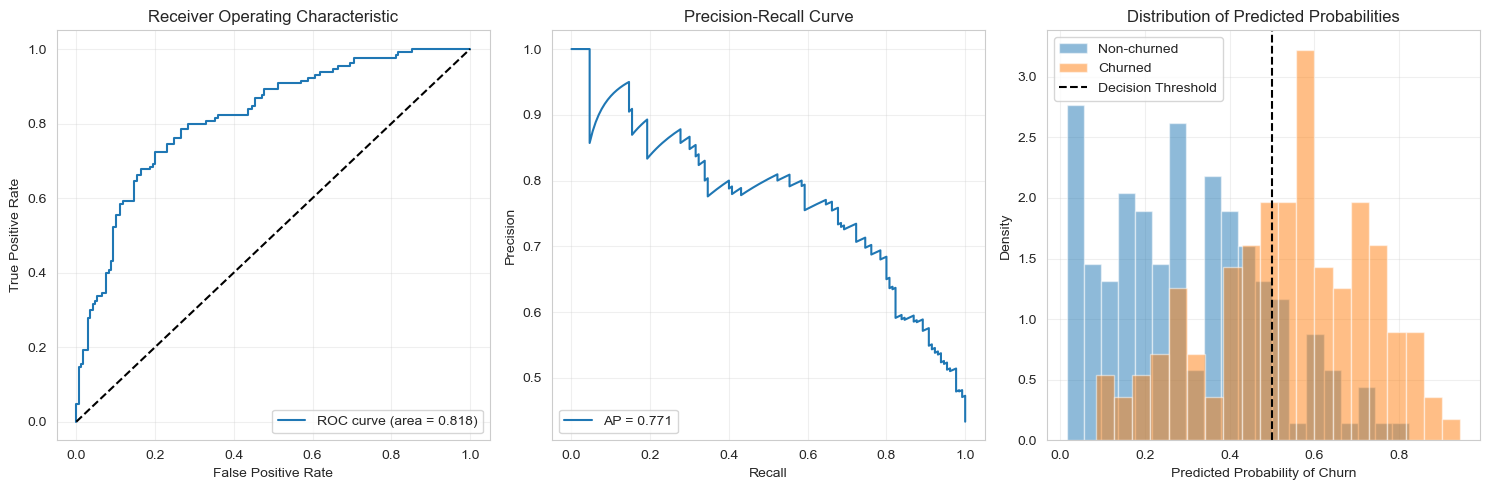

In [38]:
# Visualize model performance
plt.figure(figsize=(15, 5))

# ROC curve
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Precision-Recall curve
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label=f'AP = {average_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

# Histogram of predicted probabilities
plt.subplot(1, 3, 3)
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.5, label='Non-churned', density=True)
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.5, label='Churned', density=True)
plt.axvline(x=0.5, color='k', linestyle='--', label='Decision Threshold')
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [39]:
# Business application: retention strategy based on churn probability
# Define costs and benefits
acquisition_cost = 200  # Cost to acquire a new customer
retention_cost = 50   # Cost of retention offer
monthly_value = 70    # Average monthly value of a customer

# Add predictions to test data
test_results = X_test.copy()
test_results['Churn'] = y_test
test_results['Churn_Probability'] = y_pred_prob

# Define risk segments
bins = [0, 0.3, 0.5, 0.7, 1.0]
labels = ['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
test_results['Risk_Segment'] = pd.cut(test_results['Churn_Probability'], bins=bins, labels=labels)

# Analyze segments
segment_analysis = test_results.groupby('Risk_Segment').agg({
    'Churn': ['count', 'mean'],
    'MonthlyCharges': 'mean',
    'Tenure': 'mean'
})

print("\nCustomer Risk Segmentation:")
print(segment_analysis)


Customer Risk Segmentation:
               Churn           MonthlyCharges     Tenure
               count      mean           mean       mean
Risk_Segment                                            
Low Risk         112  0.169643      60.967548  30.795650
Medium Risk       83  0.373494      57.718764  16.160562
High Risk         74  0.729730      58.160213  11.534148
Very High Risk    31  0.838710      64.051640   6.365482


C:\Users\solom\AppData\Local\Temp\ipykernel_21780\2246001284.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = test_results.groupby('Risk_Segment').agg({


In [40]:
# Calculate expected value of different strategies
thresholds = np.linspace(0, 1, 21)  # 0 to 1 in 0.05 increments
results = []

for threshold in thresholds:
    # Target customers above the threshold with retention offers
    target_retention = test_results['Churn_Probability'] >= threshold
    
    # Calculate costs and benefits
    num_targeted = np.sum(target_retention)
    retention_costs = num_targeted * retention_cost
    
    # Customers who would churn without intervention
    would_churn = test_results['Churn'] == 1
    
    # Customers we save (assuming 30% effectiveness of retention program)
    effectiveness = 0.3
    saved = would_churn & target_retention
    num_saved = np.sum(saved) * effectiveness
    
    # Value of saved customers (6 months of additional value)
    saved_value = num_saved * monthly_value * 6
    
    # Net value
    net_value = saved_value - retention_costs
    
    # Store results
    results.append({
        'Threshold': threshold,
        'Customers Targeted': num_targeted,
        'Retention Costs': retention_costs,
        'Customers Saved': num_saved,
        'Saved Value': saved_value,
        'Net Value': net_value
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Find the optimal threshold
optimal_row = results_df.loc[results_df['Net Value'].idxmax()]
optimal_threshold = optimal_row['Threshold']

print("\nOptimal Retention Strategy:")
print(f"Threshold: Target customers with churn probability ≥ {optimal_threshold:.2f}")
print(f"Customers targeted: {optimal_row['Customers Targeted']:.0f} ({optimal_row['Customers Targeted']/len(test_results):.1%} of customer base)")
print(f"Expected net value: ${optimal_row['Net Value']:.2f}")


Optimal Retention Strategy:
Threshold: Target customers with churn probability ≥ 0.45
Customers targeted: 129 (43.0% of customer base)
Expected net value: $5394.00


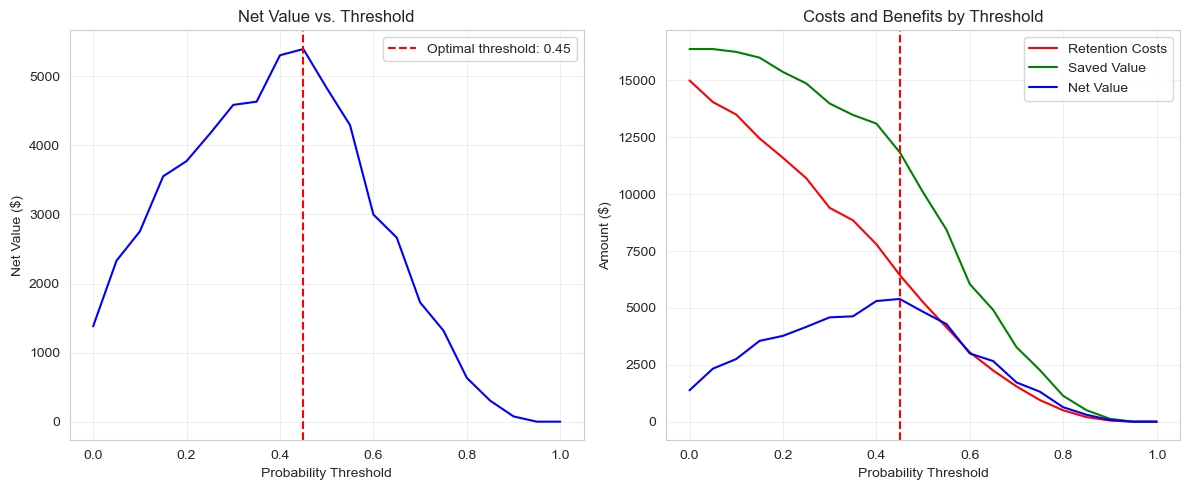

In [41]:
# Visualize the optimization results
plt.figure(figsize=(12, 5))

# Net value by threshold
plt.subplot(1, 2, 1)
plt.plot(results_df['Threshold'], results_df['Net Value'], 'b-')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', 
           label=f'Optimal threshold: {optimal_threshold:.2f}')
plt.xlabel('Probability Threshold')
plt.ylabel('Net Value ($)')
plt.title('Net Value vs. Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Costs and benefits breakdown
plt.subplot(1, 2, 2)
plt.plot(results_df['Threshold'], results_df['Retention Costs'], 'r-', label='Retention Costs')
plt.plot(results_df['Threshold'], results_df['Saved Value'], 'g-', label='Saved Value')
plt.plot(results_df['Threshold'], results_df['Net Value'], 'b-', label='Net Value')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Probability Threshold')
plt.ylabel('Amount ($)')
plt.title('Costs and Benefits by Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This churn prediction example demonstrates how probabilistic outputs enable:
1. Risk stratification of customers
2. Prioritization of retention efforts 
3. Optimization of business decisions based on costs and benefits
4. Better resource allocation for maximum ROI

## 6. Exercises

### Exercise 1: Probability Calibration

A well-calibrated probabilistic classifier should produce probabilities that match the actual frequency of the events. For instance, among all predictions with around 80% probability, about 80% should actually be positive.

Analyze the calibration of the churn prediction model:

In [ ]:
from sklearn.calibration import calibration_curve

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.plot(prob_pred, prob_true, 's-', label='Logistic Regression')

plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate Brier score (lower is better)
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(y_test, y_pred_prob)
print(f"Brier score: {brier_score:.4f} (lower is better)")



### Exercise 2: Decision Thresholds for Different Business Goals

Different business goals might require different decision thresholds. Analyze how the threshold affects various metrics:



In [ ]:
# Calculate metrics at different thresholds
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

thresholds = np.linspace(0.1, 0.9, 9)
metrics = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    accuracy = accuracy_score(y_test, y_pred_thresh)
    
    metrics.append({
        'Threshold': threshold,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Accuracy': accuracy
    })

metrics_df = pd.DataFrame(metrics)

# Plot metrics vs threshold
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], 'b-', label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], 'g-', label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], 'r-', label='F1 Score')
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], 'c-', label='Accuracy')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Decision Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Scenario 1: A company wants to maximize recall (find most churners)
max_recall_thresh = metrics_df.loc[metrics_df['Recall'].idxmax()]['Threshold']

# Scenario 2: A company wants to maximize precision (avoid false alarms)
max_precision_thresh = metrics_df.loc[metrics_df['Precision'].idxmax()]['Threshold']

# Scenario 3: A company wants to balance precision and recall
max_f1_thresh = metrics_df.loc[metrics_df['F1 Score'].idxmax()]['Threshold']

print("\nOptimal thresholds for different business goals:")
print(f"Maximize Recall (find most churners): {max_recall_thresh:.2f}")
print(f"Maximize Precision (minimize false alarms): {max_precision_thresh:.2f}")
print(f"Balance Precision and Recall (F1 Score): {max_f1_thresh:.2f}")



### Exercise 3: Ensemble Methods for Better Probability Estimation

Ensemble methods often provide better probability estimates by combining predictions from multiple models:



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Train multiple models
# 1. Logistic Regression (already trained)
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 3. SVM with probability calibration
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Get probability predictions from each model
lr_probs = churn_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]

# Create a simple average ensemble
ensemble_probs = (lr_probs + rf_probs + svm_probs) / 3

# Calculate AUC for each model
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

print("\nModel AUC Comparison:")
print(f"Logistic Regression: {lr_auc:.4f}")
print(f"Random Forest: {rf_auc:.4f}")
print(f"SVM: {svm_auc:.4f}")
print(f"Ensemble (Average): {ensemble_auc:.4f}")

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {ensemble_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Summary

In this notebook, we've explored how probability concepts connect to machine learning:

- **Probabilistic Classifiers** output confidence levels, not just binary predictions
- **Logistic Regression** uses the sigmoid function to convert linear outputs to probabilities
- **Naive Bayes** applies Bayes' theorem with a conditional independence assumption
- **Cross-entropy Loss** measures the quality of probabilistic predictions
- **Softmax Function** turns neural network outputs into valid probability distributions
- **Decision Thresholds** can be optimized for different business goals
- **Calibration** ensures predicted probabilities match actual frequencies

These probabilistic approaches enable:
- Better decision-making under uncertainty
- Risk stratification and prioritization
- Cost-benefit optimization
- Transparency in model confidence

In real-world applications like customer churn prediction, probabilistic outputs are crucial for making informed business decisions and optimizing resource allocation.

## 8. Additional Resources

If you want to explore these concepts further, check out:

- [Scikit-learn User Guide: Probability Calibration](https://scikit-learn.org/stable/modules/calibration.html) - More on calibration techniques
- [Sebastian Raschka: ROC Curves and AUC](https://rasbt.github.io/mlxtend/user_guide/evaluate/plot_roc/) - Detailed explanation of ROC curves
- [3Blue1Brown: Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Visual explanation of neural networks
- [Coursera: Probabilistic Graphical Models](https://www.coursera.org/specializations/probabilistic-graphical-models) - Advanced course on probabilistic models